<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/Multivariate_Analysis_Formal_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

多元统计分析的内容十分丰富，主要包括判别分析、聚类分析、主成分分析、因子分析、回归分析预测方法、方差分析、典型相关分析、时间序列等。具体方法的选择也与问题的形式有关，这篇文章里我会结合案例去说明和分析，主要是数模和kaggle的素材为主:)

文章的结构可以分为以下几个章节：
- 假设检验和方差分析的介绍(扶贫)
- 数据分析流水线的介绍(结合不同形式问题的案例)
- 具体用到的多元分析方法的介绍(数学推导+代码封装)

主要的案例有：
- 数模高教杯2005B，2012A，2020C，2021C，2021E
- kaggle上的一些比赛的notebook

In [1]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/MA")
!ls

ab_testing.xlsx


In [3]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn

--2022-08-30 03:57:00--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  34.4MB/s    in 0.3s    

2022-08-30 03:57:00 (34.4 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fsKERl26TNTFIY25PhReoCujxwJvfyHn
To: /content/drive/MyDrive/dataset/MathModel/MA/SimHei .ttf
100% 10.1M/10.1M [00:00<00:00, 28.9MB/

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 改style要在改font之前
plt.style.use('seaborn')  

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')

# Statistics Knowledge


第一部分是统计学知识扶贫😋，其实不论是数模还是kaggle，都会碰到需要进行对数据的各种统计学分析，然后各种统计假设检验多种多样，很容易搞不清，这里就来结合案例做个详细的tutorial。首先会给出整体的big picture， 然后对于常用的假设检验会进行详细的介绍。

> 这个系列真的是很棒，这里挑其中的假设检验部分来说说
>
>https://www.scribbr.com/statistics/statistical-tests/

统计测试被用在假设检验测试中，它们可以用来
- 决定一个预测变量(自变量)是不是和一个因变量具有显著的统计关系：比如regression以后的F-test。
- 估计两个或多个数据分布的差异：比如kaggle经常进行的T-test。


### 什么是假设检验

看这个解释的很详细
>https://www.zhihu.com/question/323210651/answer/2404265924
>
>[Significant Value](https://zhuanlan.zhihu.com/p/61524138)


![](https://picx.zhimg.com/v2-d102fdcf2d27c04fb2766ed82008e0db_r.jpg?source=1940ef5c)

![](https://picx.zhimg.com/v2-8941d9d302bb95b4334daae26e718fce_r.jpg?source=1940ef5c)

## 怎么选择统计检验
To determine which statistical test to use, you need to know:

- hether your data meets certain assumptions.
- the types of variables that you’re dealing with.

### Statistical assumptions
Statistical tests make some common assumptions about the data they are testing:

1. Independence of observations (a.k.a. no autocorrelation): The observations/variables you include in your test are not related (for example, multiple measurements of a single test subject are not independent, while measurements of multiple different test subjects are independent).
2. Homogeneity of variance: the variance within each group being compared is similar among all groups. If one group has much more variation than others, it will limit the test’s effectiveness.
3. Normality of data: the data follows a normal distribution (a.k.a. a bell curve). This assumption applies only to quantitative data.
If your data do not meet the assumptions of normality or homogeneity of variance, you may be able to perform a nonparametric statistical test, which allows you to make comparisons without any assumptions about the data distribution.

If your data do not meet the assumption of independence of observations, you may be able to use a test that accounts for structure in your data (repeated-measures tests or tests that include blocking variables).

If your data do not meet the assumption of independence of observations, you may be able to use a test that accounts for structure in your data (repeated-measures tests or tests that include blocking variables)




## 选择怎样的统计测试
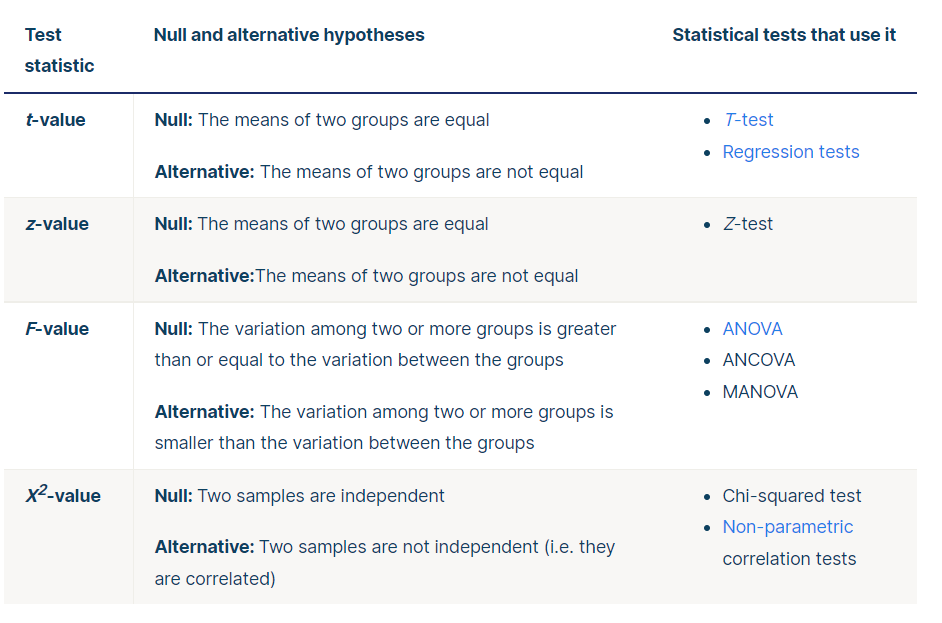





### **Choosing a parametric test: regression, comparison, or correlation**

Parametric tests usually have stricter requirements than nonparametric tests, and are able to make stronger inferences from the data. They can only be conducted with data that adheres to the common assumptions of statistical tests.

The most common types of parametric test include regression tests, comparison tests, and correlation tests.

#### Regression tests
Regression tests look for cause-and-effect relationships. They can be used to estimate the effect of one or more continuous variables on another variable.

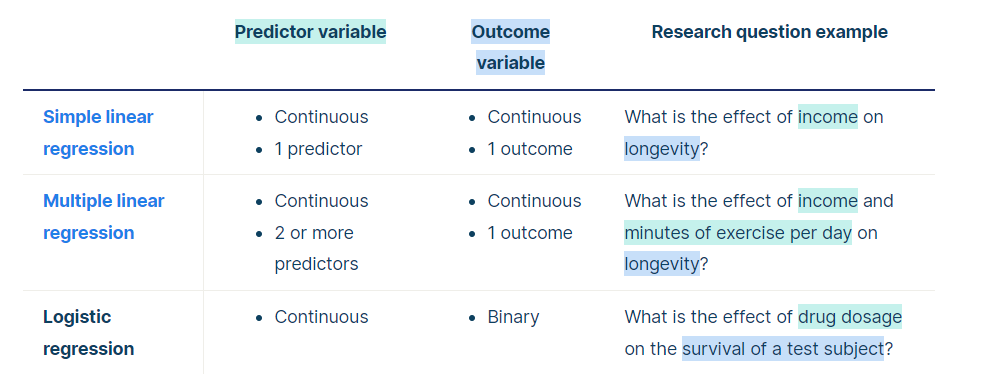

#### Comparison tests
Comparison tests look for differences among group means. They can be used to test the effect of a categorical variable on the mean value of some other characteristic.

T-tests are used when comparing the means of precisely two groups (e.g. the average heights of men and women). ANOVA and MANOVA tests are used when comparing the means of more than two groups (e.g. the average heights of children, teenagers, and adults).



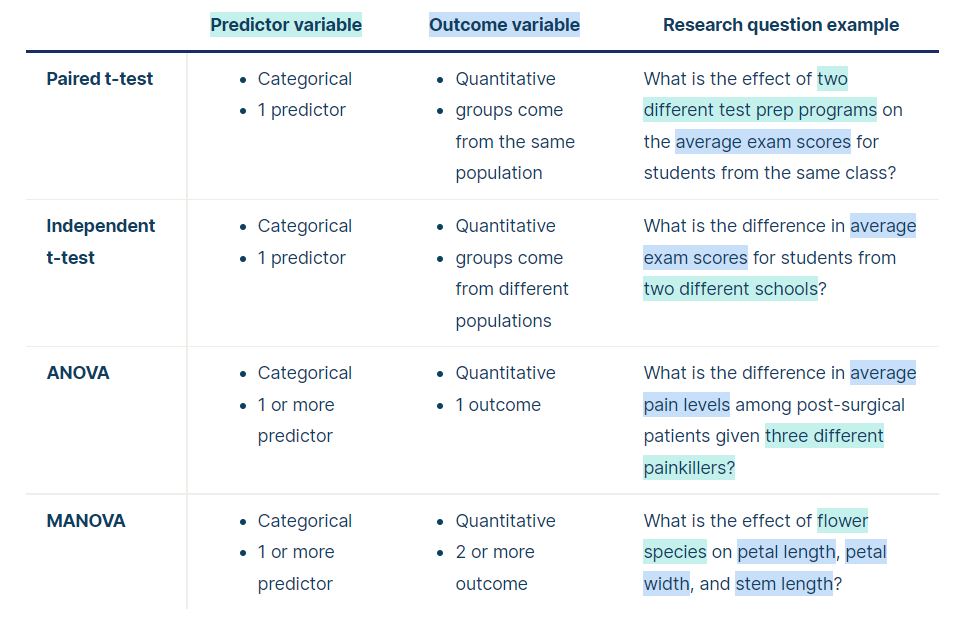

#### Correlation tests
Correlation tests check whether variables are related without hypothesizing a cause-and-effect relationship.

These can be used to test whether two variables you want to use in (for example) a multiple regression test are autocorrelated.



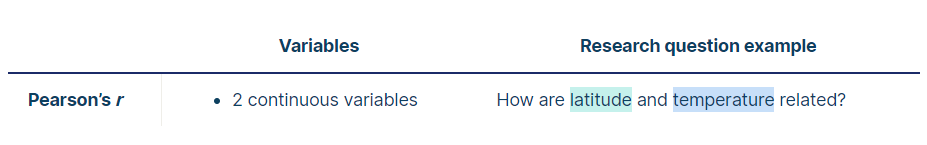

### Choosing a nonparametric test
Non-parametric tests don’t make as many assumptions about the data, and are useful when one or more of the common statistical assumptions are violated. However, the inferences they make aren’t as strong as with parametric tests.



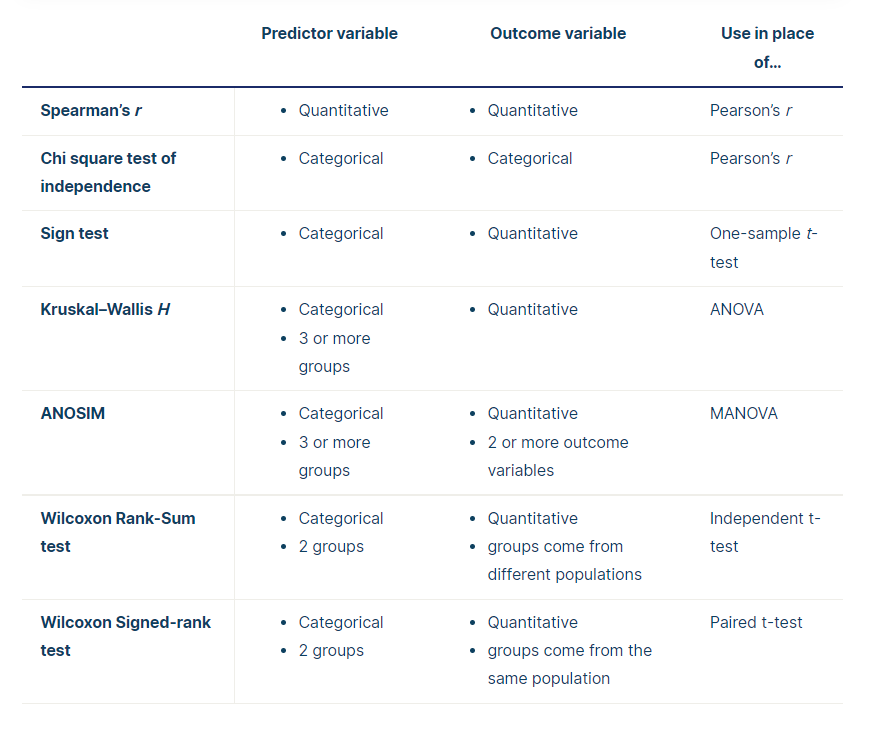

### Flowchart: choosing a statistical test
This flowchart helps you choose among parametric tests. For nonparametric alternatives, check the table above.


![](https://cdn.scribbr.com/wp-content/uploads/2020/01/flowchart-for-choosing-a-statistical-test.png)

## 常用假设检验的介绍

上面说了那么多，首先是为了获得整体的感知，接下来将会具体地介绍一些常用的假设检验：
- 相关性：Pearson和Spearman
- 卡方检验
- F检验
- T检验

以及和对应统计量(P-value,T-value,F-value...)的关系。

### 相关性分析的介绍

### 卡方检验的介绍

### F检验的介绍

F检验是被誉为现代统计学之父的R.A. Fisher爵士提出、由George W. Snedecor命名的统计检验方法，主要用于方差齐性检验、方差分析等等。它是一种在零假设（null hypothesis, H0）之下，统计值服从F-分布的检验。

本节介绍F检验的如下应用：

- 方差齐性检验（F-test of equality of variances）
- 方差分析（Analysis of Variance, ANOVA）
- 线性回归方程整体的显著性检验




#### 方差齐性检验

**概念理解**

方差齐性检验是数理统计学中检查不同样本的总体方差是否相同的一种方法，基本原理是先对总体的特征作出某种假设，然后通过抽样研究的统计推理，对此假设应该被拒绝还是接受作出推断。 

>方差分析 (ANOVA) 和回归等许多统计过程都假定：虽然不同样本可能来自均值不同的总体，但它们的方差都相同。

方差齐性检验的目的就是看我们拿到的两个样本的波动是否是一样的。如果方差不一样，我们就无法比较这两个样本所代表的整体哪个更好。

比如说，两个人比赛跳远，其中一个人是晴天跳远，地很干，摩擦力大，所以他跳远距离的数据的方差很小。另一个人在雨天跳远，地上很滑，那么他跳远距离的数据的方差就很大。我们就无法判断谁比谁跳得好，因为地面状态这个噪声（Noise）的影响实在是太大了。

在实际应用时，我们无法知晓所有的Noise是否是一样的，因为干扰项实在是太多了。所以，我们通过比较方差是否一致，来判断收集的数据中的噪声是否是差不多的。

常用的方法有：方差比、Hartley检验、Levene检验、BF法、Bartlett检验。这里只研究方差比和Levene检验。

**方差比齐次检验**

目的：方差齐性是方差分析和一些均数比较$t$检验的重要前提，利用$F$检验进行方差齐性检验是最原始的，但对数据要求比较高。

要求：样本来自两个独立的、服从正态分布的总体。



> 这里直接copy了一些资料，最后会附上参考的文章）把公式再码一遍是数模也要用🙃

记两独立总体为：
$$X_1 \sim N(\mu_1, \sigma_1^2), X_2 \sim N(\mu_2, \sigma_2^2)$$
从两总体中抽取的样本为：
$$X_{1i}(i=1,2,...,n_1),X_{2j}(j=1,2,...,n_2)$$
定义样本均值和样本方差：
$$\bar X_1 = {1\over n_1}\sum_{i=1}^{n_1}X_{i1},s_1^2 = {1\over n_1 - 1}\sum_{i=1}^{n_1}(X_{i1}-\bar X_1)^2$$
$$\bar X_2 = {1\over n_2}\sum_{i=1}^{n_2}X_{i2},s_1^2 = {1\over n_2 - 1}\sum_{i=1}^{n_2}(X_{i1}-\bar X_2)^2$$
方差齐性双侧检验的原假设和备择假设：
$$H_0:\sigma_1^2 = \sigma_2^2$$
$$H_0:\sigma_1^2 \neq \sigma_2^2$$
由$F$分布的构造定义：
$${{s_1^2 / \sigma_1^2}\over {s_2^2 / \sigma_2^2}} \sim F(n_1 - 1, n_2 - 1)$$
其中$n_1-1、n_2-1$分别是分子自由度和分母自由度。

在$H_0$成立的条件下，即$\sigma_1^2 = \sigma_2^2$成立的条件下：
$${s_1^2 \over s_2^2} \sim F(n_1-1,n_2-1)$$

一般约定取较大的方差作为分子，较小的方差作为分母，这样计算出来的$F>1$，缩小了范围，便于查表做出结论。给定显著性水平$\alpha$，利用样本数据计算统计量$F_1 = {s_1^2 \over s_2^2}$，若$F_1 > F_{\alpha,(n_1-1,n_2-1)}$，这在一次抽样中几乎是不可能发生的（其发生的可能性为值）此时拒绝原假设，认为方差不齐，否则就不拒绝原假设（即认为方差齐）。



**Levene检验**

Levene检验是将每个值先转换为为该值与其组内均值的偏离程度，然后再用转换后的偏离程度去做方差分析，即组间方差/组内方差。

Levene检验不需要正态性假设，这点和基于$F$检验的方差比方法不同，说明该方法更具有稳健性。

检验假设$H_0:\sigma_1=\sigma_2=...=\sigma_k$，即各处理组方差相等。$H_1:\sigma_i \neq \sigma_j$，各处理组方差不全相等。

计算检验统计量$W$值：

$$W=\frac{(N-k) \sum_{i=1}^k N_i\left(\bar{Z}_{i \cdot}-\bar{Z}_{..}\right)^2}{(k-1) \sum_{i=1}^k \sum_{j=1}^{N_i}\left(\bar{Z}_{i j}-\bar{Z}_{i \cdot}\right)^2}$$
其中：$W$为Levene检验统计量，$k$为样本组数，$N_i$为第$i$个样本的含量，$N$为各样本含量之和，$Z_{ij}$为将原始数据经数据转换后的新的变量值。$\bar Z_{i.}$为第$i$个样本的均数，$\bar Z_{..} $为全部数据的总的均数。

$Z_{ij}$可以定义为下列三种定义之一：
1. $Z_{ij}=|Y_{ij} - \bar Y_{i.}|$，其中$Y_{ij}$是原始数据，$\bar Y_{i.}$是原始数据中第i个样本的算数平均数。
2. $Z_{ij}=|Y_{ij} - \widetilde Y_{i.}|$，其中$\widetilde Y_{i.}$是原始数据中第i个样本的中位数。
3. $Z_{ij}=|Y_{ij} - \bar Y_{i.}'|$，其中$\bar Y_{i.}'$是原始数据中第i个样本的10%调整均数。

10%调整均数是指去除小于$P_5$和大于$P_{95}$的数据后，计算在$P_{5}$和$P_{95}$之间数据的算数平均。

以上对原始数据的转换均取了差值的绝对值，这三种转换方式就确定了Levene检验具有较好的稳健性和把握度。对原始数据的转换方式不同，计算的Levene统计量的大小也有所不同。SPSS中的Levene检验使用了第一种转换方式。三种数据转换方式可以适用于不同的数据类型，第一种主要用于对称分布或正态分布的资料，第二种转换方式可可用于偏态分布的资料，第三种转换方式可用于有极端值或离群值的资料。

判断原则：Levene检验统计量$W$服从自由度为$\nu_1 = k-1, \nu_2=N-k$的$F$分布。
$$W \sim F(k-1,N-k)$$

当$W \geq F(\alpha, k-1,N-k)$ 时，则$P \leq \alpha$，在$\alpha$水准上拒绝$H_0$，接受$H_1$。

下面一个小demo看看测试集训练集方差的齐次性

数据：https://www.kaggle.com/code/bahaulug/a-b-testing/notebook

In [5]:
df_control = pd.read_excel("ab_testing.xlsx",sheet_name= "Control Group")
df_test = pd.read_excel("ab_testing.xlsx",sheet_name= "Test Group")

In [6]:
# example
from scipy.stats import levene
test_stat, pvalue = levene(df_control['Purchase'],  df_test['Purchase']) # 也可以多组比较，这里只用了两组
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


p-value > $\alpha$值，所以接受原假设，也就是方差齐次。

### 方差分析

所有的方差分析研究的都是因子的不同水平是否有差异，这个差异就是看同一因子的各个水平下的指标的均值的差异是否显著。但是我们又不能想当然把各个水平下指标的均数直接计算进行比较，因为还要考虑抽样的随机性，要用假设检验和概率分布来处理这个问题，如何度量“抽样得到的各个水平的差异'更多地'是来自各个水平自身的差异，'较少地'来自抽样误差便成了这个假设检验问题的关键。


**one-way ANOVA(单因素方差分析)**

假设：
- 方差的同质性（homogeneity of variance）。可以理解为每组样本背后的总体（也叫族群）都有相同的方差；
- 族群遵循正态分布；
- 每一次抽样都是独立的。在我们的例子中，每一个病人只能提供一个数据。对于一些实验一个样本需要提供多个数据，有其他相应的ANOVA分析方法。

ANOVA是通过分析如下统计量来做出结论：
$$F=\frac{S S A / df_1}{S S E / df_2}$$
其中$SSA$是各个水平之间的偏差平方和，也可以说成是组间平方和（Sum of Square Between Groups），$SSE$是各个水平内部的偏差平方和，可以说成是组内偏差平方和，可以理解为上面说的误差的平方和（Sum of Square Error），$df_1$，$df_2$分别是它们的自由度。不直接把$SSA/SSE$作为评判依据，而是各自除以了自由度是因为偏差平方和会因不同组元素数量而有差异，除以自由度就得到了方差，确保这两个偏差平凡和在平均意义下是可比的。

这样处理的intuition可以看这个:[link](https://zhuanlan.zhihu.com/p/57896471?utm_source=qq&utm_medium=social&utm_oi=696809991633371136)

**数学推导**

接下来证明这个式子确实是遵循$F-distribution$。


### T检验的介绍

### 回归分析中用到的假设检验

- 多元回归分析中的t检验和F检验如何使用？ - 田品的回答 - 知乎
https://www.zhihu.com/question/43146224/answer/2312158121

# Data Analysis Pipeline

## 特征选择

https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html#acknowledgements

# Analysis Methods Introduction

本节将侧重于介绍多元分析中用到的方法，数学推导和代码封装。

## 判别分析

## 聚类分析

## 主成分分析

## 因子分析

## 回归分析

判别分析模型：


选用的是mtcars这个数据集。

In [ ]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/Regression")
!ls

mtcars.csv


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

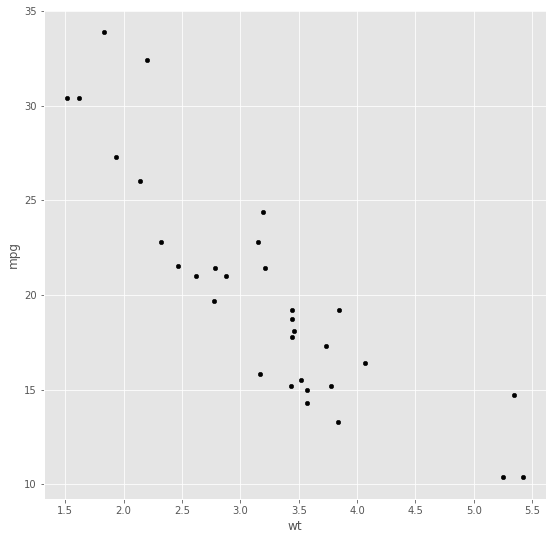

In [ ]:
# Load mtcars data set
mtcars = pd.read_csv("mtcars.csv")

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black");

可以看到在weight和mpg这两个特征间大体上有着线性关系，所以来试试线性回归。

In [ ]:
from sklearn import linear_model
from sklearn.feature_selection import f_regression

In [ ]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)


37.28512616734204
[-5.34447157]


In [ ]:
# F-test: return F value and p value
f_regression(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"], center=True)

(array([91.375325]), array([1.2939587e-10]))

We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:



In [ ]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])


0.7528327936582646

The output of the score function for linear regression is "R-squared", a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model. In this case, car weight explains roughly 75% of the variance in mpg.

The R-squared measure is based on the residuals: differences between what the model predicts for each data point and the actual value of each data point. We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:



In [ ]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Actual - prediction = residuals
residuals = mtcars["mpg"] - train_prediction

residuals.describe()


count    3.200000e+01
mean    -8.215650e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

R-squared is calculated as 1 - (SSResiduals/SSTotal) were SSResiduals is the sum of the squares of the model residuals and SSTotal is the sum of the squares of the difference between each data point and the mean of the data. We could calculate R-squared by hand like this:



In [ ]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)


0.7528327936582646

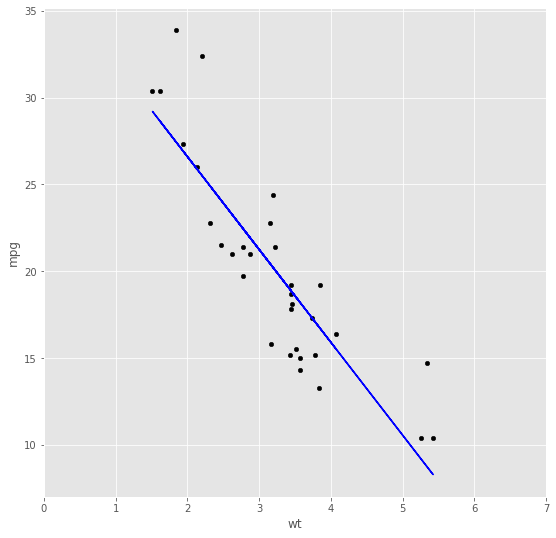

In [ ]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");


Outliers can have a large influence on linear regression models: since regression deals with minimizing squared residuals, large residuals have a disproportionately large influence on the model. Plotting the result helps us detect influential outliers. In this case there does not appear to be any influential outliers. Let's add an outlier--a super heavy fuel efficient car--and plot a new regression model:



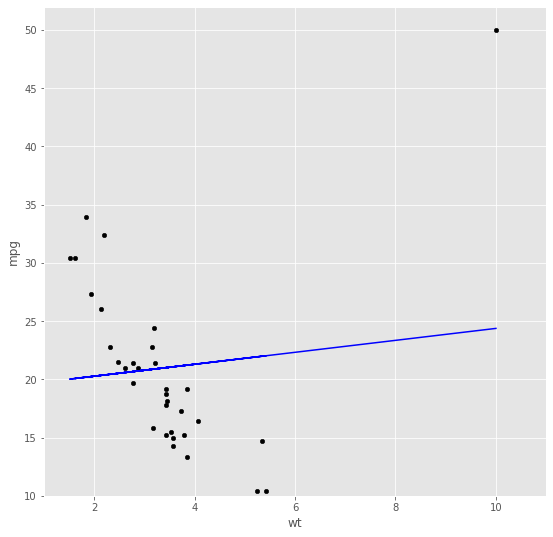

In [ ]:
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue");

Although this is an extreme, contrived case, the plot above illustrates how much influence a single outlier can have on a linear regression model.

In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. That is, we'd like a roughly even spread of error above and below the regression line. We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot. Make a qqplot by passing the residuals to the stats.probplot() function in the scipy.stats library:



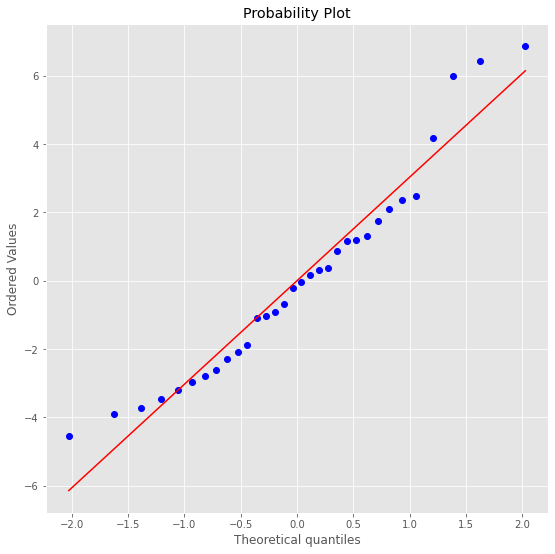

In [ ]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

#参考资料
F检验--https://zhuanlan.zhihu.com/p/139151375